In [61]:
import os
import tensorflow as tf
import pandas as pd
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
dataset_dir = 'PE Classification Dataset'
os.listdir(dataset_dir)

['.ipynb_checkpoints',
 'data',
 'test_final',
 'train.csv',
 'train_final',
 'valid_final']

In [4]:
data = pd.read_csv(os.path.join(dataset_dir, 'train.csv'))
data.head()

,StudyInstanceUID,SeriesInstanceUID,SOPInstanceUID,pe_present_on_image,negative_exam_for_pe,qa_motion,qa_contrast,flow_artifact,rv_lv_ratio_gte_1,rv_lv_ratio_lt_1,leftsided_pe,chronic_pe,true_filling_defect_not_pe,rightsided_pe,acute_and_chronic_pe,central_pe,indeterminate
0,6897fa9de148,2bfbb7fd2e8b,c0f3cb036d06,0,0,0,0,0,0,1,1,0,0,1,0,0,0
1,6897fa9de148,2bfbb7fd2e8b,f57ffd3883b6,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,6897fa9de148,2bfbb7fd2e8b,41220fda34a3,0,0,0,0,0,0,1,1,0,0,1,0,0,0
3,6897fa9de148,2bfbb7fd2e8b,13b685b4b14f,0,0,0,0,0,0,1,1,0,0,1,0,0,0
4,6897fa9de148,2bfbb7fd2e8b,be0b7524ffb4,0,0,0,0,0,0,1,1,0,0,1,0,0,0


In [35]:
# Retrieving PE records from train.csv file
data_pe = data.loc[data["pe_present_on_image"] == 1, :].reset_index(drop=True)
data_pe.loc[893:900]

,StudyInstanceUID,SeriesInstanceUID,SOPInstanceUID,pe_present_on_image,negative_exam_for_pe,qa_motion,qa_contrast,flow_artifact,rv_lv_ratio_gte_1,rv_lv_ratio_lt_1,leftsided_pe,chronic_pe,true_filling_defect_not_pe,rightsided_pe,acute_and_chronic_pe,central_pe,indeterminate
893,d6aeb045d7a9,fe8ffb9e1ab9,4649cb98a03e,1,0,0,0,0,1,0,1,0,0,1,0,0,0
894,d6aeb045d7a9,fe8ffb9e1ab9,d0df7cf8bd25,1,0,0,0,0,1,0,1,0,0,1,0,0,0
895,d6aeb045d7a9,fe8ffb9e1ab9,956c9b8d9955,1,0,0,0,0,1,0,1,0,0,1,0,0,0
896,d6aeb045d7a9,fe8ffb9e1ab9,86e00a45b87e,1,0,0,0,0,1,0,1,0,0,1,0,0,0
897,d6aeb045d7a9,fe8ffb9e1ab9,405152947a27,1,0,0,0,0,1,0,1,0,0,1,0,0,0
898,d6aeb045d7a9,fe8ffb9e1ab9,bc1b5cc17430,1,0,0,0,0,1,0,1,0,0,1,0,0,0
899,d6aeb045d7a9,fe8ffb9e1ab9,217a7422c681,1,0,0,0,0,1,0,1,0,0,1,0,0,0
900,d6aeb045d7a9,fe8ffb9e1ab9,6b1c3cb3688e,1,0,0,0,0,1,0,1,0,0,1,0,0,0


In [49]:
# Retrieving Non-PE records from train.csv file
data1 = pd.read_csv(os.path.join(dataset_dir, 'train.csv'))
data_no_pe = data1.loc[(data1["pe_present_on_image"] == 0) & (data1["negative_exam_for_pe"] == 1), :].reset_index(drop=True)
data_no_pe.loc[892:899]

,StudyInstanceUID,SeriesInstanceUID,SOPInstanceUID,pe_present_on_image,negative_exam_for_pe,qa_motion,qa_contrast,flow_artifact,rv_lv_ratio_gte_1,rv_lv_ratio_lt_1,leftsided_pe,chronic_pe,true_filling_defect_not_pe,rightsided_pe,acute_and_chronic_pe,central_pe,indeterminate
892,66b048cd99ac,7eb149b96d62,4de59f6ab555,0,1,0,0,0,0,0,0,0,0,0,0,0,0
893,66b048cd99ac,7eb149b96d62,a17e9eb33015,0,1,0,0,0,0,0,0,0,0,0,0,0,0
894,66b048cd99ac,7eb149b96d62,e6879e94f766,0,1,0,0,0,0,0,0,0,0,0,0,0,0
895,66b048cd99ac,7eb149b96d62,36edae064e7d,0,1,0,0,0,0,0,0,0,0,0,0,0,0
896,66b048cd99ac,7eb149b96d62,ed76f4187382,0,1,0,0,0,0,0,0,0,0,0,0,0,0
897,66b048cd99ac,7eb149b96d62,5e23626e2e35,0,1,0,0,0,0,0,0,0,0,0,0,0,0
898,66b048cd99ac,7eb149b96d62,25da71a5581d,0,1,0,0,0,0,0,0,0,0,0,0,0,0
899,66b048cd99ac,7eb149b96d62,cd9890375a48,0,1,0,0,0,0,0,0,0,0,0,0,0,0


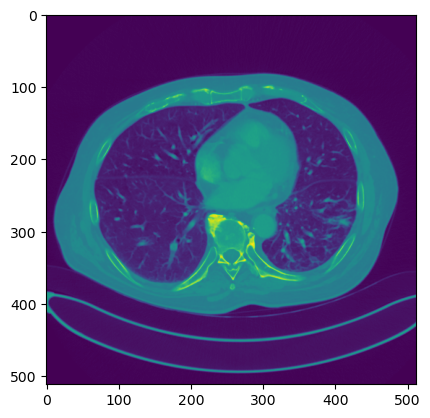

In [50]:
image = pydicom.dcmread(os.path.join(dataset_dir, 'data', 'converted_images', 'train_converted', 'pe_converted', '0e79a433e660.dcm'))
im = image.pixel_array.astype('float32')
scale = (np.maximum(im, 0)/im.max())
plt.imshow(scale)

In [51]:
def get_image_names(path):
    names = []
    for root, dirname, filenames in os.walk(path):
        for filename in filenames:
            _, ext = os.path.splitext(filename)
            if ext in ['.dcm']:
                names.append(filename)
    return names

In [62]:
train_pe_names = get_image_names(os.path.join(dataset_dir, 'data', 'train', 'pe'))

train_no_pe_names = get_image_names(os.path.join(dataset_dir, 'data', 'train', 'no_pe'))

valid_pe_names = get_image_names(os.path.join(dataset_dir, 'data', 'valid', 'pe'))

valid_no_pe_names = get_image_names(os.path.join(dataset_dir, 'data', 'valid', 'no_pe'))

In [54]:
def convert_pe_train_images_jpg(name):
    path = os.path.join(dataset_dir, 'data', 'train', 'pe',) + '\\' + name
    im = pydicom.dcmread(path)
    im = im.pixel_array.astype(float)
    rescale_image = (np.maximum(im, 0)/im.max()) * 255
    final_image= np.uint8(rescale_image)
    final_image = Image.fromarray(final_image).convert('RGB')
    return final_image

In [ ]:
for name in train_pe_names:
    image = convert_pe_train_images_jpg(name)
    image.save(os.path.join(dataset_dir,'train_final', 'pe')+ '\\' + name + '.jpg')

In [55]:
def convert_no_pe_train_images_jpg(name):
    path = os.path.join(dataset_dir, 'data', 'train', 'no_pe',) + '\\' + name
    im = pydicom.dcmread(path)
    im = im.pixel_array.astype(float)
    rescale_image = (np.maximum(im, 0)/im.max()) * 255
    final_image= np.uint8(rescale_image)
    final_image = Image.fromarray(final_image).convert('RGB')
    return final_image

In [ ]:
for name in train_no_pe_names:
    image = convert_no_pe_train_images_jpg(name)
    image.save(os.path.join(dataset_dir, 'train_final', 'no_pe')+ '\\' + name + '.jpg')

In [57]:
def convert_pe_valid_images_jpg(name):
    path = os.path.join(dataset_dir, 'data', 'valid', 'pe',) + '\\' + name
    im = pydicom.dcmread(path)
    im = im.pixel_array.astype(float)
    rescale_image = (np.maximum(im, 0)/im.max()) * 255
    final_image= np.uint8(rescale_image)
    final_image = Image.fromarray(final_image).convert('RGB')
    return final_image

In [58]:
for name in valid_pe_names:
    image = convert_pe_valid_images_jpg(name)
    image.save(os.path.join(dataset_dir, 'valid_final', 'pe')+ '\\' + name + '.jpg')

In [59]:
def convert_no_pe_valid_images_jpg(name):
    path = os.path.join(dataset_dir, 'data', 'valid', 'no_pe',) + '\\' + name
    im = pydicom.dcmread(path)
    im = im.pixel_array.astype(float)
    rescale_image = (np.maximum(im, 0)/im.max()) * 255
    final_image= np.uint8(rescale_image)
    final_image = Image.fromarray(final_image).convert('RGB')
    return final_image

In [60]:
for name in valid_no_pe_names:
    image = convert_no_pe_valid_images_jpg(name)
    image.save(os.path.join(dataset_dir, 'valid_final', 'no_pe')+ '\\' + name + '.jpg')